# ML Regression Forrest Fire Prediction

## Part 2: EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df0 = pd.read_csv('algerian-forest-fire-dataset_cleaned.csv')
df = df0.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    int64  
 5   ws           243 non-null    int64  
 6   rain         243 non-null    float64
 7   ffmc         243 non-null    float64
 8   dmc          243 non-null    float64
 9   dc           243 non-null    float64
 10  isi          243 non-null    float64
 11  bui          243 non-null    float64
 12  fwi          243 non-null    float64
 13  classes      243 non-null    int64  
 14  region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [4]:
df

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [5]:
df['classes'].value_counts()

classes
1    137
0    106
Name: count, dtype: int64

In [6]:
classes_pct = df['classes'].value_counts(normalize=True) * 100

In [7]:
classes_labels = ['Fire','Not Fire']

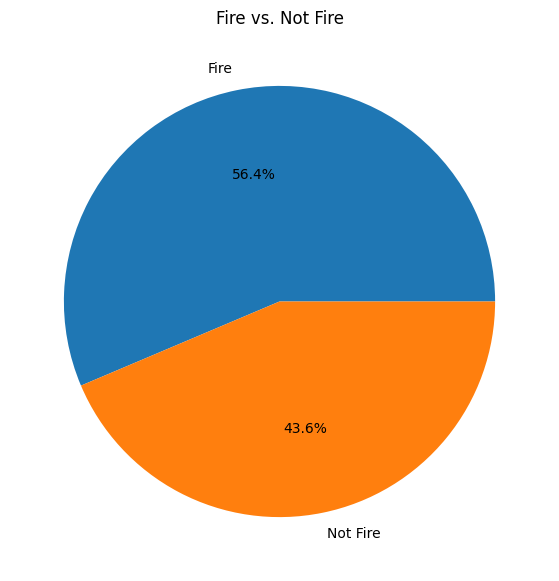

In [8]:
# Pie Chart: Fire vs. Not Fire

plt.figure(figsize=(12,7))
plt.pie(classes_pct,labels=classes_labels,autopct='%1.1f%%')
plt.title('Fire vs. Not Fire')

plt.show();

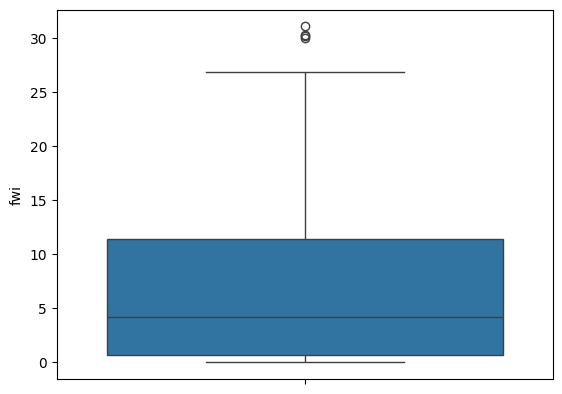

In [9]:
sns.boxplot(df['fwi']);

Text(0.5, 1.0, 'Fire Analysis of Sidi Bel Region')

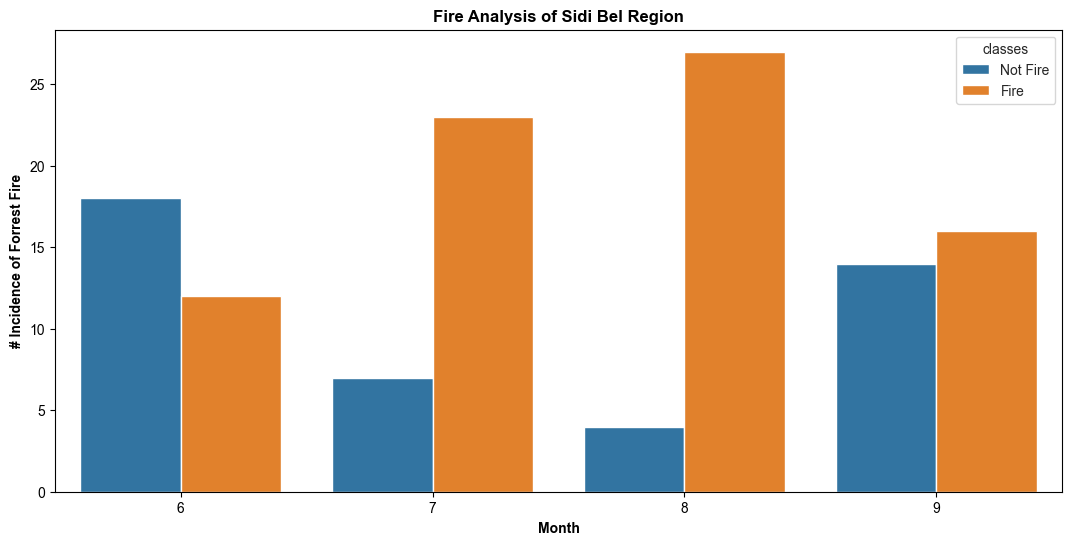

In [10]:
# Monthly Fire analysis

region1 = df.loc[df['region']== 1]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')
ax = sns.countplot(x='month',hue='classes',data=region1)

plt.xlabel('Month', weight='bold')
plt.ylabel('# Incidence of Forrest Fire', weight='bold')

# Define custom labels
custom_labels = ['Not Fire', 'Fire']

# Get current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Set the new legend labels
ax.legend(handles=handles, labels=custom_labels, title='classes')

plt.title('Fire Analysis of Sidi Bel Region', weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Region')

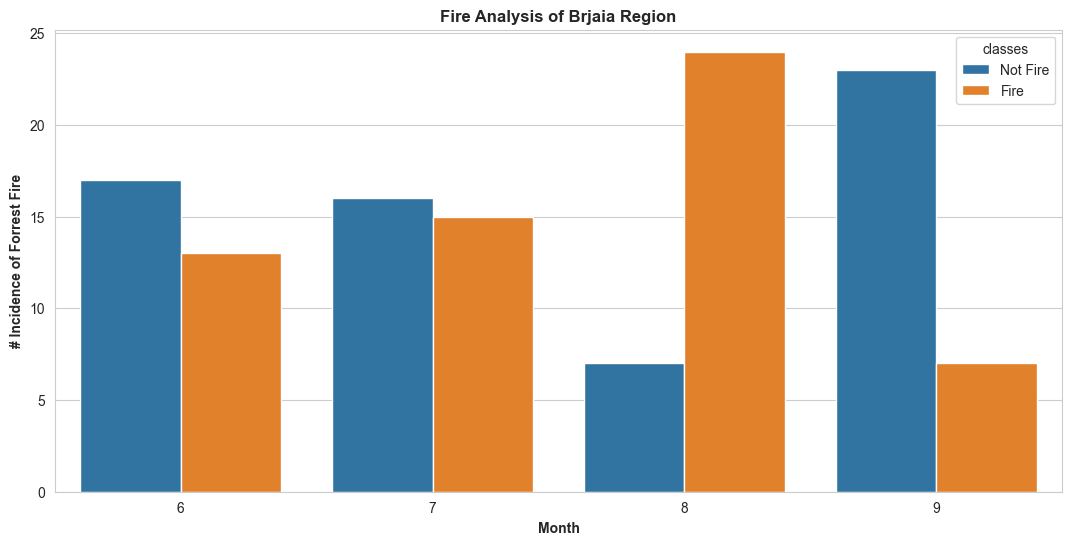

In [11]:
# Monthly Fire analysis

region0 = df.loc[df['region']== 0]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')
ax = sns.countplot(x='month',hue='classes',data=region0)

plt.xlabel('Month', weight='bold')
plt.ylabel('# Incidence of Forrest Fire', weight='bold')

# Define custom labels
custom_labels = ['Not Fire', 'Fire']

# Get current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Set the new legend labels
ax.legend(handles=handles, labels=custom_labels, title='classes')

plt.title('Fire Analysis of Brjaia Region', weight='bold')

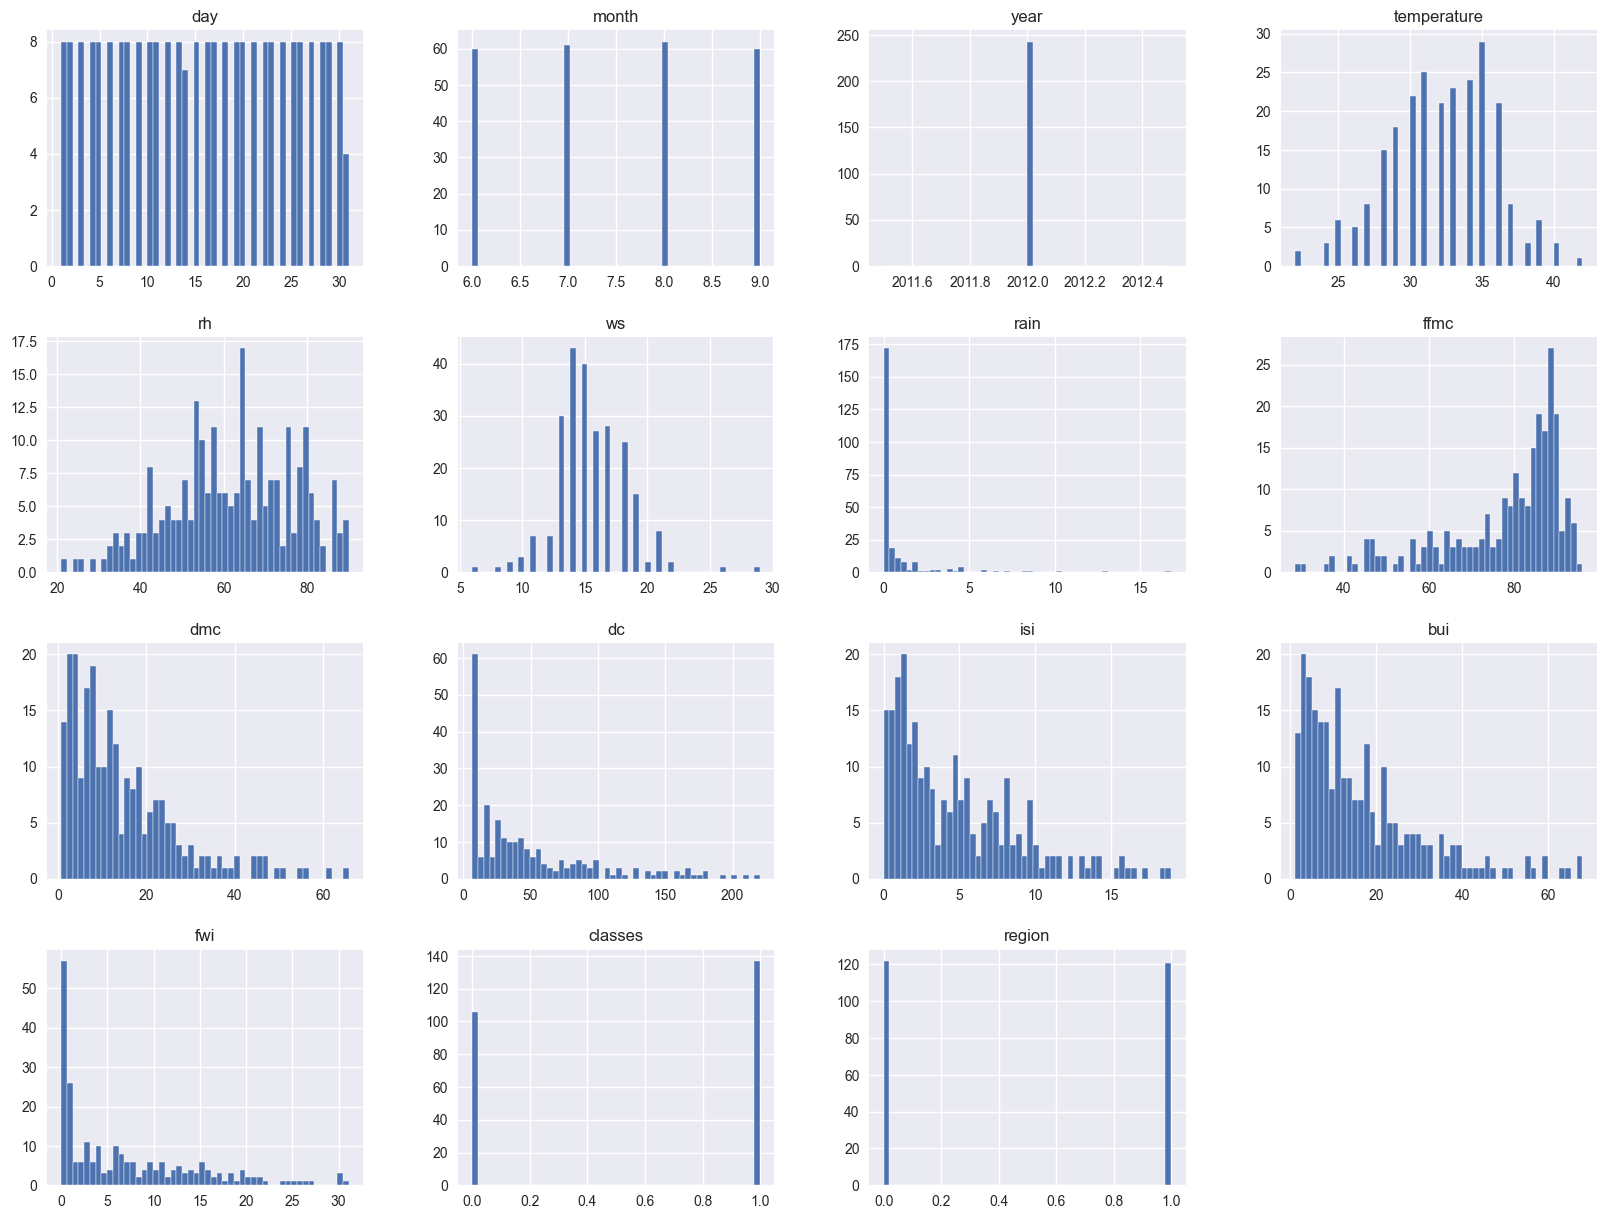

In [12]:
plt.style.use('seaborn-v0_8')

df.hist(bins=50, figsize=(20, 15))

plt.show();

---

## Feature Engineering

In [13]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

#### Drop Date Cols

In [14]:
date_cols = ['day','month','year']

df = df.drop(date_cols, axis=1)

In [15]:
df.columns

Index(['temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui',
       'fwi', 'classes', 'region'],
      dtype='object')

##### Declare Independent Features & a Dependent Feature

In [16]:
X = df.drop('fwi', axis=1)

In [17]:
y = df['fwi']

In [18]:
X.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [19]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: fwi, dtype: float64

## Train-Test Split Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [23]:
y_train.shape, y_test.shape

((182,), (61,))

### Assess Feature Correlations

In [24]:
X_train_corr = X_train.corr()

In [25]:
X_train_corr

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,classes,region
temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
rh,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
ffmc,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
dmc,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
dc,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
isi,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
bui,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


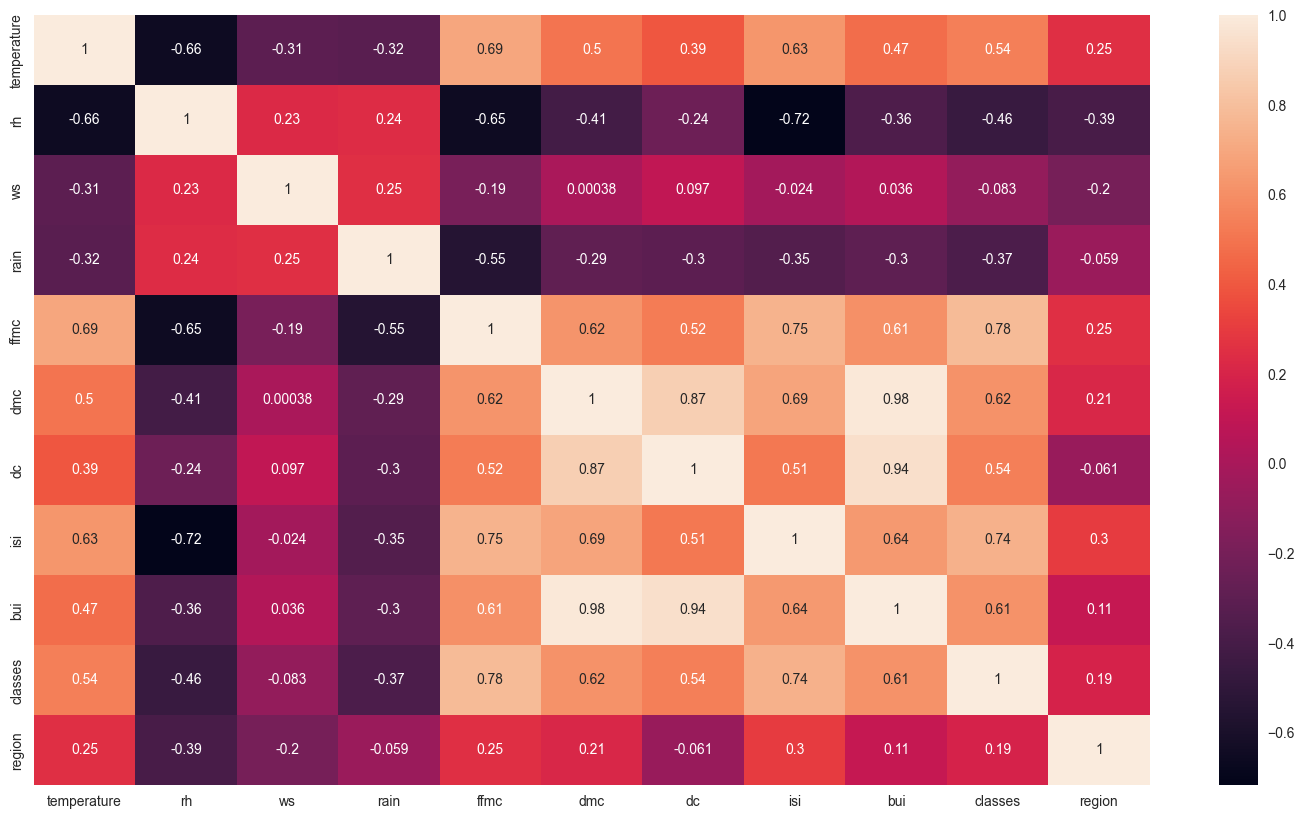

In [26]:
plt.figure(figsize=(18,10))
sns.heatmap(X_train_corr, annot=True)

plt.show();

In [27]:
def correlation_detector(dataset,threshold):

    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:

                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)

    return col_corr

In [28]:
corr_ftrs = correlation_detector(X_train, 0.85) 

In [29]:
# Detect correlated features
corr_ftrs

{'bui', 'dc'}

In [30]:
# From X_train & X_test: Remove extremely well correlated features to avoid multicollinearity
X_train.drop(corr_ftrs, axis=1, inplace=True)
X_test.drop(corr_ftrs, axis=1, inplace=True)

In [31]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature Scaling

### Standardisation

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

In [37]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

## Boxplots: Effect of StandardScaler

Text(0.5, 1.0, 'X_train before Scaling')

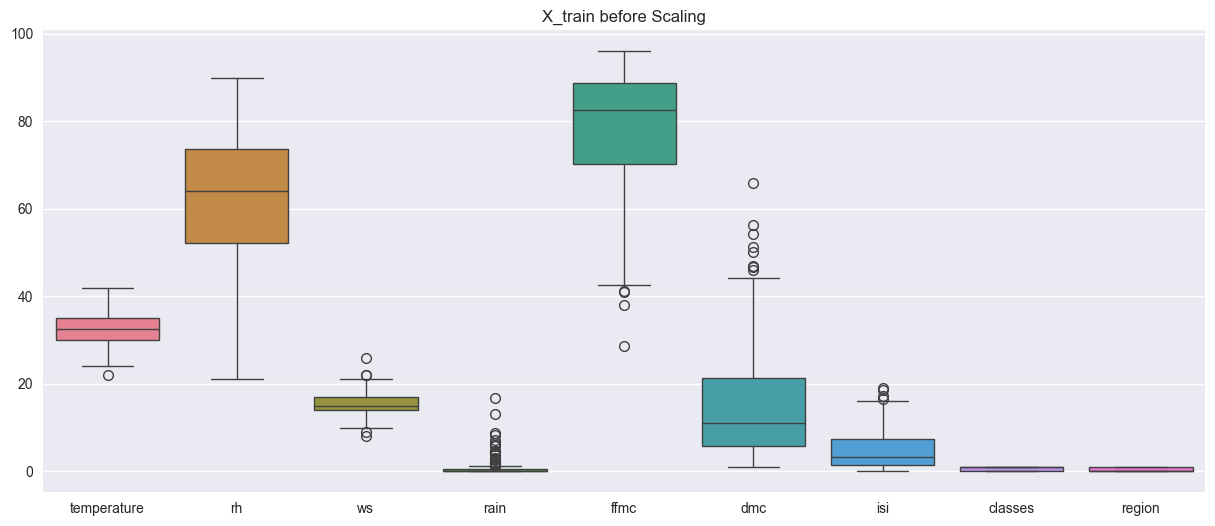

In [ ]:
plt.figure(figsize=(15,6))

sns.boxplot(data=X_train)
plt.title('X_train before Scaling');

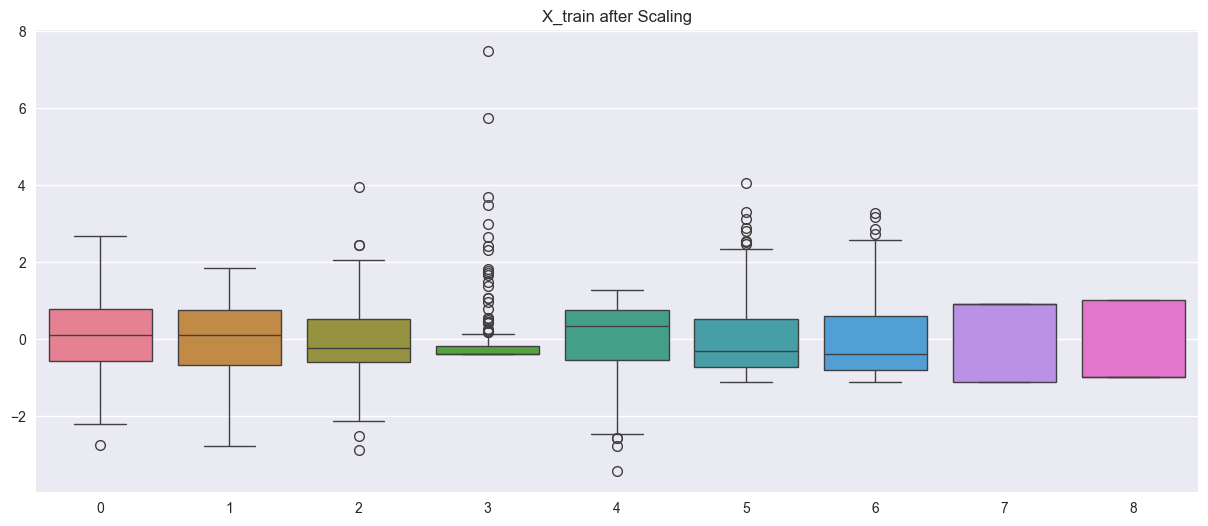

In [43]:
plt.figure(figsize=(15,6))

sns.boxplot(data=X_train_scaled)
plt.title('X_train after Scaling');

---

## Model Training

### Linear Regression

### Lasso Regression

### Ridge Regression

### ElasticNet Regression

---